<center>
    <p style="font-family:PiliApp;font-size:30px;font-variant:small-caps;text-align:center;color:green">
        Master Sciences du Numérique et Intelligence Artificielle<br>
        Module : Machine Learning <br>
        Projet: <h3 >Prédiction du niveau de stress chez les étudiants à partir des habitudes de vie</h3>
<br>
        realisé par : MAKBOUL WIAM ET BOUTALAT HIBA
    </p>
</center>


## Introduction
Ce projet vise à prédire le niveau de stress chez les étudiants à partir de leurs habitudes de vie. En particulier, nous comparons trois modèles de Machine Learning :
- Random Forest (méthode d’ensemble par bagging)
- XGBoost (méthode d’ensemble par boosting)
- Réseau de Neurones Multi-Layer Perceptron (MLP)

Le problème est formulé comme une tâche de classification binaire :
- 0 : stress faible (score entre 1 et 5)
- 1 : stress élevé (score entre 6 et 10)

L’objectif est de modéliser les relations entre les habitudes de vie et le niveau de stress perçu, puis d’en tirer des recommandations.

## Description du dataset
### Source des données

- **Source** : [Questionnaire Google Forms](https://docs.google.com/forms/d/e/1FAIpQLSfupRglwyLA0vUyKTfkKS9m2eSB5gKh3EzXnbLKHlGMYwzc1Q/viewform?usp=dialog) distribué aux étudiants
- **Méthode de collecte** : Auto-évaluation par questionnaire en ligne  
- **Population cible** : Étudiants universitaires  
- **Période de collecte** : 5jours  

### Variables collectées

#### Variables explicatives (features)

- `heures_sommeil` : Nombre d'heures de sommeil par nuit (4-12 heures)  
- `heures_etude` : Temps d'étude quotidien (0-13 heures)  
- `temps_ecran` : Temps d'exposition aux écrans par jour (2-14 heures)  
- `activite_physique` : Durée d'activité physique hebdomadaire (0-300 minutes)  
- `frequence_repas` : Nombre de repas pris par jour (1-4 repas)  
- `interactions_sociales` : Nombre d'interactions sociales par semaine (2-30)  
- `pratique_spirituelle` : Pratique de méditation/spiritualité (0=Non, 1=Oui)  
- `nb_cours_projets` : Charge académique - nombre de cours/projets simultanés (0-12)  

#### Variable cible (target)

- `score_stress` : Niveau de stress auto-évalué sur une échelle de 1 à 10  
  - **Type** : Variable continue  
  - **Possibilité de binarisation** : stress faible (1-5) vs stress élevé (6-10)

  ---


# Partie Théorique

## Méthodes ensemblistes (Ensemble learning)
Ensemble learning améliore les performances en combinant plusieurs modèles plutôt qu’un seul. L’idée est de faire voter un ensemble de classifieurs pour obtenir une prédiction plus stable et plus précise. Les deux principales techniques sont le Bagging et le Boosting, qui réduisent la variance et augmentent la robustesse du modèle global.

### 1-Bagging

Le **Bagging** (*Bootstrap Aggregating*) s’agit d’un ensemble homogène d’apprenants faibles (weak learners), entraînés indépendamment et en parallèle, puis combinés pour produire une meilleure prédiction.
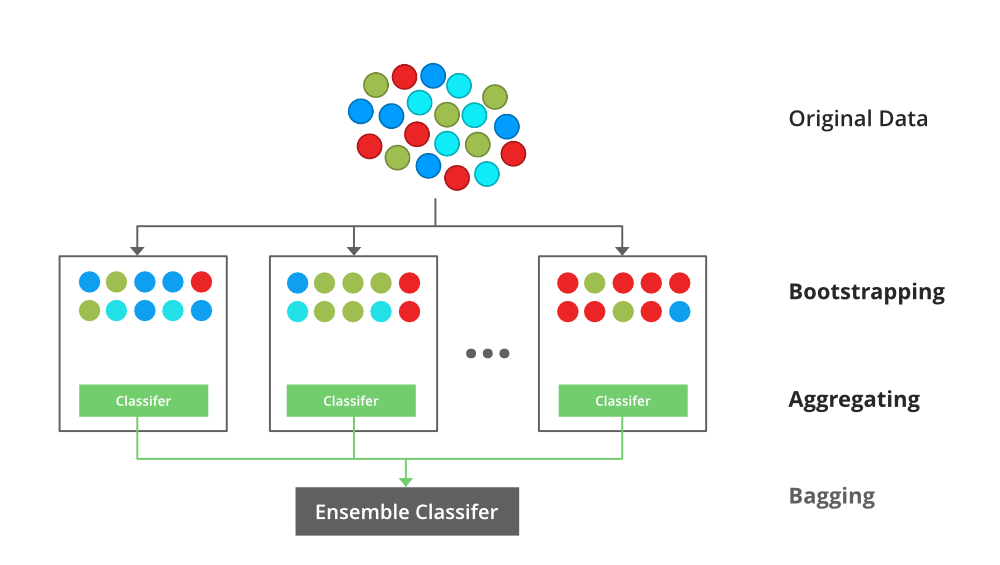

#### Termes clés :
- **Bootstrap** : technique d’échantillonnage aléatoire avec remise, ce qui permet de générer plusieurs sous-jeux de données à partir du jeu d’origine.
- **Agrégation** : combinaison des prédictions issues de plusieurs modèles par **vote majoritaire** (classification) ou **moyenne** (régression).

### Ses étapes :

*Étape 1* : Plusieurs sous-ensembles sont créés à partir de l’ensemble de données d’origine avec des uplets égaux, en sélectionnant les observations avec remplacement.

*Étape 2* : Un modèle de base est créé sur chacun de ces sous-ensembles.

*Étape 3* : Chaque modèle est appris en parallèle avec chaque ensemble d’entraînement et indépendamment les uns des autres.

*Étape 4* : Les prédictions finales sont déterminées en combinant les prédictions de tous les modèles.

### Avantages :
- Réduction de la variance.
- Moins sensible à l’overfitting.

---

## 1‑1 Random Forest

Le **Random Forest**est une version améliorée du bagging, composée d’un ensemble d’arbres de décision entraînés selon le principe du bagging. L’idée principale est de construire plusieurs arbres de décision et d’agréger leurs prédictions afin d’obtenir un résultat précis avec un biais minimal. L’algorithme Random Forest est très robuste face au surapprentissage et fonctionne bien même avec des données déséquilibrées ou manquantes.

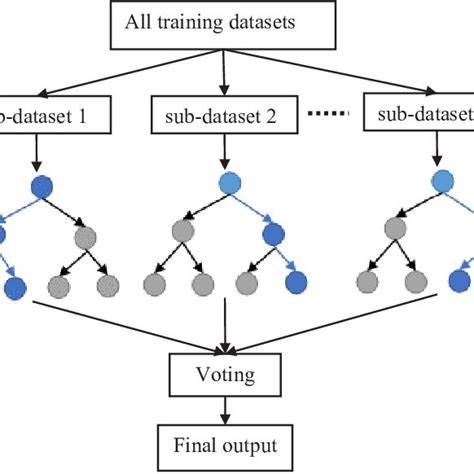

### Termes clés :
- **Arbre de décision** : Un arbre de décisions est un algorithme d’apprentissage supervisé non paramétrique, utilisé à la fois pour les tâches de classification et de régression. Il possède une structure hiérarchique et arborescente, qui se compose d’un nœud racine, de branches, de nœuds internes et de nœuds feuille.

---

## 2. Boosting

Le **Boosting** s’agit également d’un ensemble homogène d’apprenants faibles, mais contrairement au Bagging, les modèles sont entraînés de manière séquentielle et adaptative, chacun apprenant à corriger les erreurs du précédent afin d’améliorer les performances globales du modèle.
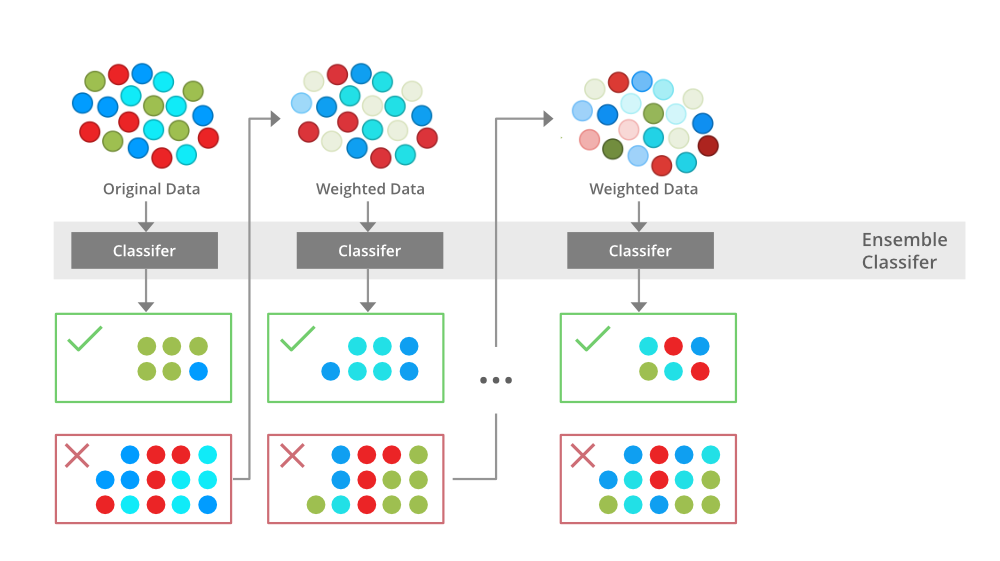

### Ses étapes :

1. Initialiser le jeu de données et attribuer un poids égal à chaque observation.
2. Entraîner le modèle sur les données pondérées.
3. Identifier les exemples mal classés.
4. Augmenter les poids des données mal classées et diminuer ceux des données bien classées.
5. Normaliser tous les poids.
6. Si les résultats souhaités sont atteints, arrêter.
Sinon, revenir à l’étape 2.

###  Avantages :

- Corrige les erreurs successives.
- Très bonne précision.
- Moins sensible à l’underfitting.

---

###  Les algorithmes de boosting

#### a) AdaBoost
- AdaBoost est l’un des premiers algorithmes de boosting à avoir été introduits, principalement utilisé pour les tâches de classification. Il utilise généralement un arbre de décision à un seul niveau, appelé souche (stump), comme modèle de base.
- L’algorithme construit un classifieur robuste en combinant plusieurs modèles faibles, en utilisant les erreurs pondérées pour accorder plus d’importance aux exemples difficiles à classer.

#### b) Gradient Boosting
- Le Gradient Boosting est une technique d'ensemble qui consiste à minimiser une fonction de perte (comme l’erreur quadratique ou l’entropie croisée).
- À chaque itération, l’algorithme utilise la descente de gradient pour calculer les résidus (les erreurs du modèle précédent) et entraîne un nouveau modèle pour les corriger.
- Ce processus se répète jusqu’à ce qu’un critère d’arrêt soit atteint, et les prédictions finales sont obtenues en sommant les contributions de tous les modèles.

#### c) XGBoost (eXtreme Gradient Boosting)
- Le XGBoost est une méthode avancée de boosting basée sur des arbres de décision, optimisée pour la performance et la vitesse. Il améliore le Gradient Boosting classique en introduisant des techniques de régularisation, une gestion efficace des données manquantes et une parallélisation des calculs.
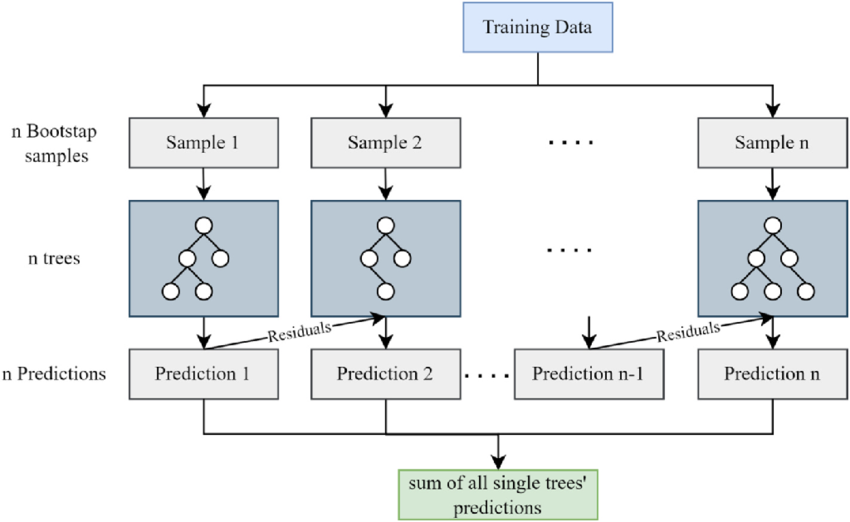

### Ses Fonctionnalités clés :

1. Régularisation : Intègre L1 (Lasso) et L2 (Ridge) directement dans l’apprentissage pour éviter le surapprentissage et améliorer la généralisation.
2. Optimisé pour la vitesse: Utilise le parallélisme (CPU/GPU) pour accélérer l’entraînement, même sur de gros datasets.
3. Gère automatiquement les valeurs manquantes.
4. Élagage avancé des arbres: Contrôle la profondeur (max_depth) et coupe les branches inutiles après la construction pour plus d’efficacité.
5. Validation croisée intégrée: Évalue le modèle à chaque étape pour déterminer automatiquement le meilleur nombre d’itérations.
6. Optimisation mémoire: Exploite au mieux la cache du CPU pour des calculs ultra-rapides.


---

## Réseau de Neurones : MLP (Multi-Layer Perceptron)
Le **MLP** est un type de réseau de neurones artificiels composé de plusieurs couches de neurones interconnectés. Contrairement aux modèles linéaires simples, les neurones d'un MLP utilisent des fonctions d'activation non linéaires (comme ReLU, sigmoïde ou tanh), ce qui permet au réseau d'apprendre des relations complexes dans les données.
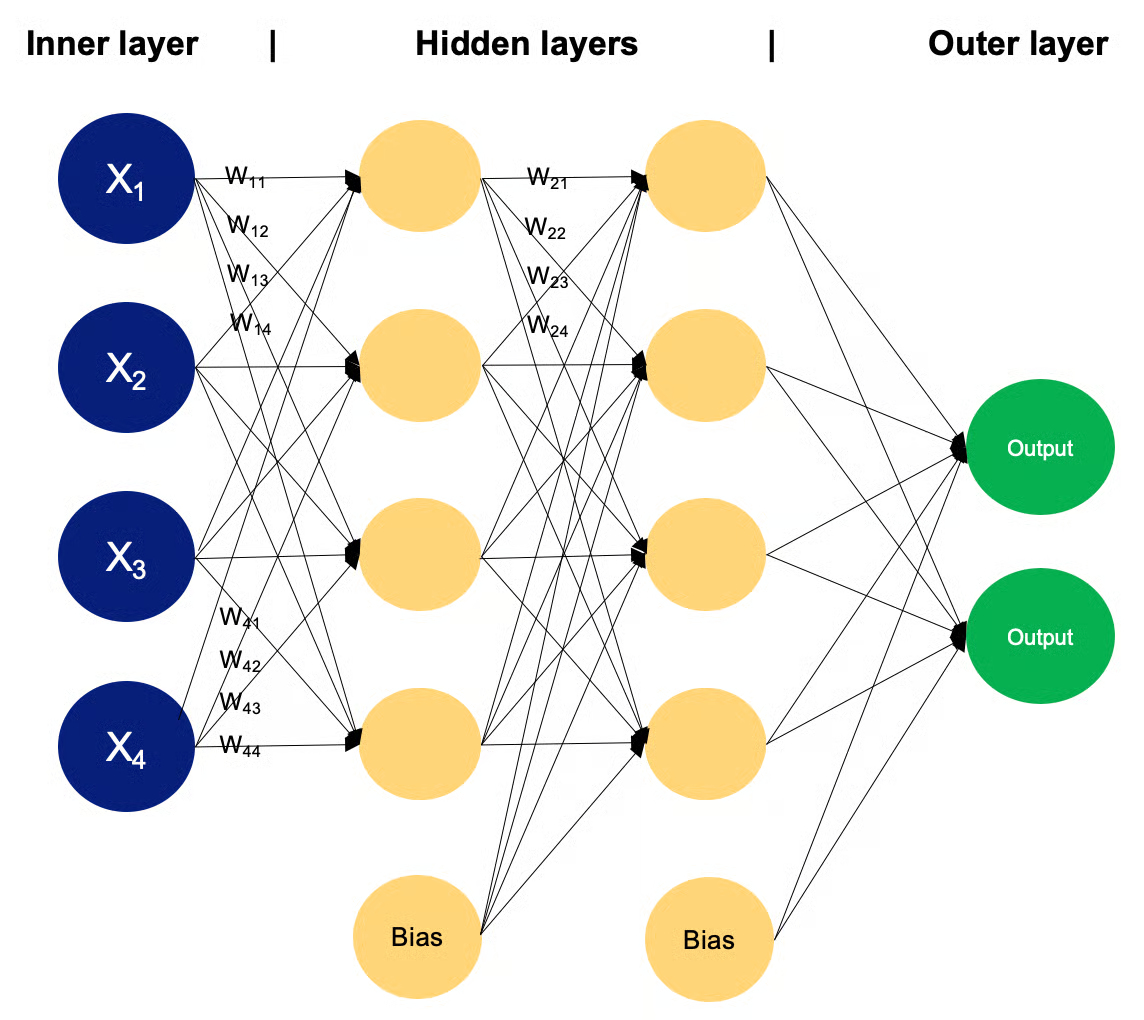

### Termes clés :
- **Input layer** : se compose de nœuds ou de neurones qui reçoivent les données d’entrée initiales. Chaque neurone représente une caractéristique ou une dimension des données d’entrée. Le nombre de neurones dans la couche d’entrée est déterminé par la dimensionnalité des données d’entrée.
- **Couches cachées** : Entre les couches d’entrée et de sortie, il peut y avoir une ou plusieurs couches de neurones. Chaque neurone dans une couche cachée reçoit des entrées de tous les neurones de la couche précédente (soit la couche d’entrée, soit une autre couche cachée) et produit une sortie qui est transmise à la couche suivante. Le nombre de couches cachées et le nombre de neurones dans chaque couche cachée sont des hyperparamètres qui doivent être déterminés pendant la phase de conception du modèle.
- **Output layer** :Cette couche se compose de neurones qui produisent la sortie finale du réseau. Le nombre de neurones dans la couche de sortie dépend de la nature de la tâche. Dans la classification binaire, il peut y avoir soit un, soit deux neurones en fonction de la fonction d’activation et représentant la probabilité d’appartenir à une classe ; tandis que dans les tâches de classification multi-classes, il peut y avoir plusieurs neurones dans la couche de sortie.
- **Weights** : Les neurones dans les couches adjacentes sont entièrement connectés entre eux. Chaque connexion a un poids associé, qui détermine la force de la connexion. Ces poids sont appris pendant le processus d’entraînement.
- **Neurones de biais** :  c'est comme un "réglage de base" qu'on ajoute à chaque couche du réseau (sauf la première). Il aide le réseau à mieux s'adapter aux données.
- **Activation function**:typiquement, chaque neurone dans les couches cachées et la couche de sortie applique une fonction d’activation à sa somme pondérée d’entrées. Les fonctions d’activation courantes incluent sigmoid, tanh, ReLU (Rectified Linear Unit) et softmax. Ces fonctions introduisent la non-linéarité dans le réseau, lui permettant d’apprendre des motifs complexes dans les données.
- **Feedforward and Backpropagation**:Feedforward c'est le mode "exécution" du réseau et Backpropagation c'est le mode "apprentissage".

### Avantages :
- Capable de modéliser des fonctions très complexes.
- Supporte les grandes bases de données.
- 
---

## Partie Pratique 


In [14]:
# 1. Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


In [16]:
# 2. Chargement et exploration des données
df = pd.read_csv("dataset_etudiant_stress.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   heures_sommeil         53 non-null     float64
 1   heures_etude           53 non-null     int64  
 2   temps_ecran            53 non-null     int64  
 3   activite_physique      53 non-null     int64  
 4   frequence_repas        53 non-null     int64  
 5   interactions_sociales  53 non-null     int64  
 6   pratique_spirituelle   53 non-null     int64  
 7   nb_cours_projets       53 non-null     int64  
 8   score_stress           53 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.9 KB
None
       heures_sommeil  heures_etude  temps_ecran  activite_physique  \
count       53.000000     53.000000    53.000000          53.000000   
mean         6.515094      4.169811     6.018868          87.641509   
std          1.341841      2.658338     2.685363          

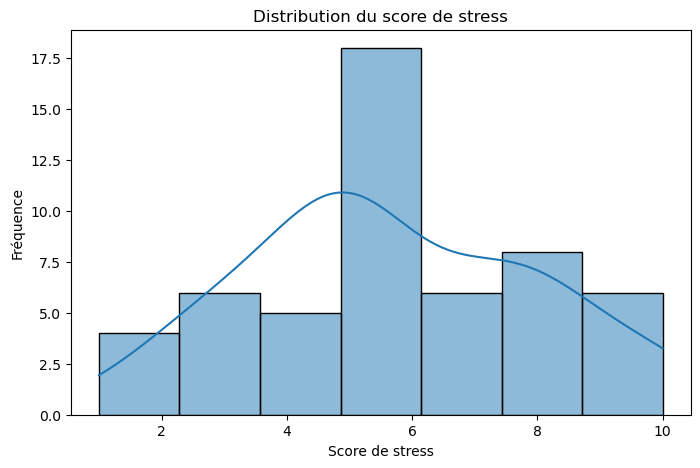

In [18]:
# 3. Visualisation exploratoire
plt.figure(figsize=(8,5))
sns.histplot(df['score_stress'], kde=True)
plt.title("Distribution du score de stress")
plt.xlabel("Score de stress")
plt.ylabel("Fréquence")
plt.show()

In [20]:
# 4. Transformation de la variable cible (classification binaire)
def binary_stress(score):
    if score <= 6:
        return 0  # Pas stressé (faible ou modéré)
    else:
        return 1  # Stressé (élevé)

df['stress_binary'] = df['score_stress'].apply(binary_stress)

In [22]:
# 5. Préparation des données
X = df.drop(columns=['score_stress', 'stress_binary'])
y = df['stress_binary']

In [24]:
# Encodage des variables catégorielles
for col in X.select_dtypes(include='object'):
    X[col] = LabelEncoder().fit_transform(X[col])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
# 6. Entraînement des modèles
## Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## XGBoost
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

## MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42, early_stopping=True)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)




-- Random Forest --
Accuracy: 0.6363636363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.50      0.50      0.50         4

    accuracy                           0.64        11
   macro avg       0.61      0.61      0.61        11
weighted avg       0.64      0.64      0.64        11



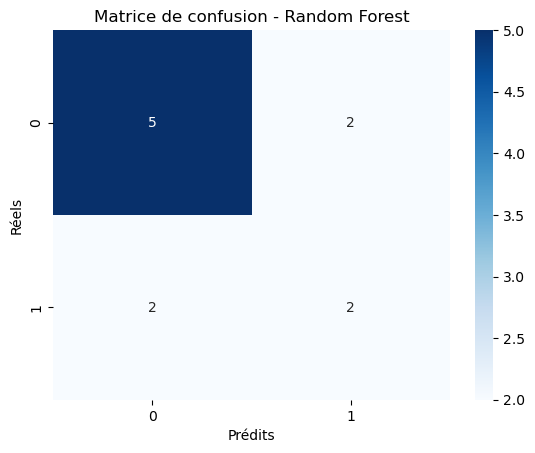



-- XGBoost --
Accuracy: 0.5454545454545454
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.40      0.50      0.44         4

    accuracy                           0.55        11
   macro avg       0.53      0.54      0.53        11
weighted avg       0.57      0.55      0.55        11



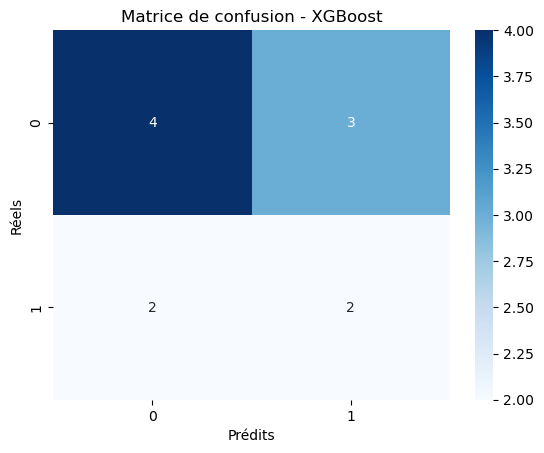



-- MLP --
Accuracy: 0.5454545454545454
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.33      0.25      0.29         4

    accuracy                           0.55        11
   macro avg       0.48      0.48      0.48        11
weighted avg       0.52      0.55      0.53        11



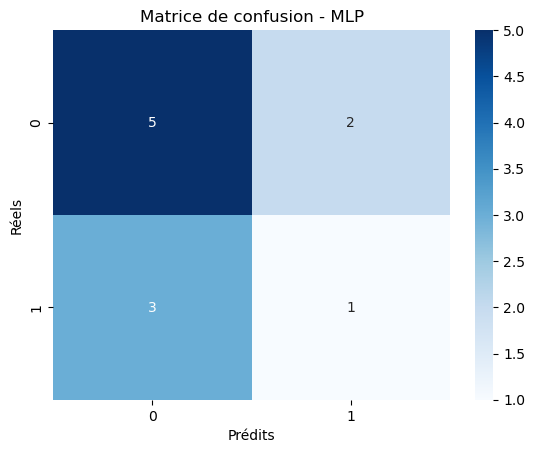

In [28]:
# 7. Évaluation des modèles
def evaluate_model(name, y_true, y_pred):
    print(f"\n\n-- {name} --")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédits")
    plt.ylabel("Réels")
    plt.show()

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("MLP", y_test, y_pred_mlp)

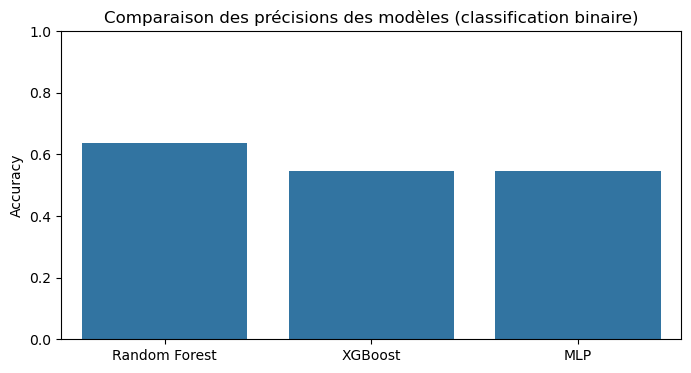

In [30]:
# 8. Analyse comparative
models = ["Random Forest", "XGBoost", "MLP"]
accuracies = [accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_xgb),
              accuracy_score(y_test, y_pred_mlp)]

plt.figure(figsize=(8,4))
sns.barplot(x=models, y=accuracies)
plt.title("Comparaison des précisions des modèles (classification binaire)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()